# 📝 Exercise M5.01

In the previous notebook, we showed how a tree with a depth of 1 level was
working. The aim of this exercise is to repeat part of the previous
experiment for a depth with 2 levels to show how the process of partitioning
is repeated over time.

Before to start, we will:

* load the dataset;
* split the dataset into training and testing dataset;
* define the function to show the classification decision function.

In [1]:
import os

os.makedirs("../../datasets", exist_ok=True)

In [2]:
%%bash

wget -qO "../../datasets/penguins_classification.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/penguins_classification.csv"

In [3]:
import pandas as pd

penguins = pd.read_csv("../../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [4]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)
range_features = {feature_name: 
    (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

Create a decision tree classifier with a maximum depth of 2 levels and fit
the training data. Once this classifier trained, plot the data and the
decision boundary to see the benefit of increasing the depth.

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

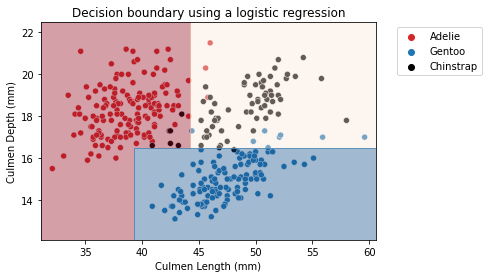

In [8]:
import seaborn as sns

palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=palette)
plot_decision_function(tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")

Did we make use of the feature "Culmen Length"?
Plot the tree using the function `sklearn.tree.plot_tree` to find out!

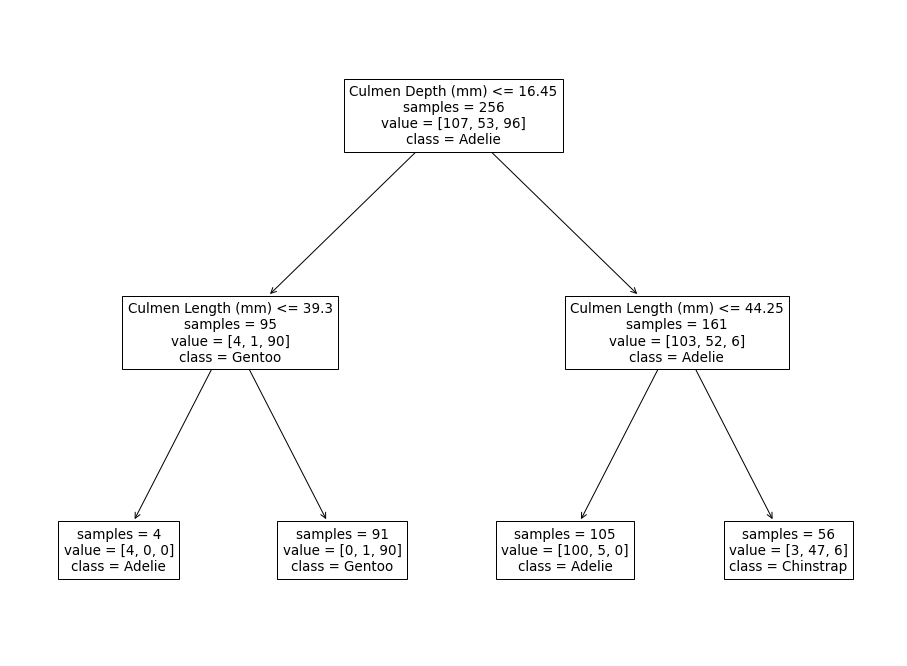

In [9]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(16, 12))
_ = plot_tree(tree, feature_names=culmen_columns,
    class_names=tree.classes_, impurity=False, ax=ax)

We see that the second tree level used the "Culmen Length" to make two new decisions. Qualitatively, we saw that such a simple tree was enough to classify the penguins' species.

Compute the accuracy of the decision tree on the testing data.

In [10]:
test_score = tree.fit(data_train, target_train)\
    .score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97


At this stage, we have the intuition that a decision tree is built by successively partitioning the feature space, considering one feature at a time.

We predict an Adelie penguin if the feature value is below the threshold, which is not surprising since this partition was almost pure. If the feature value is above the threshold, we predict the Gentoo penguin, the class that is most probable.